In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import nltk
import gensim
import spacy
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize
from nltk.corpus import stopwords

In [2]:
funded_projects = pd.DataFrame()
for root, dirs, files in os.walk("data/completed_full_csv_parts/", topdown=True):
    for file in files:
        df = pd.read_csv(os.path.join(root, file))
        funded_projects = funded_projects.append(df)

/Users/maheshrao/anaconda3/envs/capstone/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,5,11,12,15,17,19,23,24,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/maheshrao/anaconda3/envs/capstone/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,12,19,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/maheshrao/anaconda3/envs/capstone/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,11,12,15,19,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/maheshrao/anaconda3/envs/capstone/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (

In [3]:
funded_projects.head()

APPLICATION_ID ARRA_FUNDED    AWARD_NOTICE_DATE  BUDGET_END BUDGET_START  \
0         7345435         NaN  2007-12-28T00:00:00  12/29/2008   12/30/2007   
1         7350266         NaN  2007-11-19T00:00:00  12/29/2008   12/30/2007   
2         7354803         NaN  2007-12-28T00:00:00  12/29/2008   12/30/2007   
3         7354796         NaN  2008-01-02T00:00:00  12/29/2008   12/30/2007   
4         7350267         NaN  2008-01-02T00:00:00  12/29/2008   12/30/2007   

  CFDA_CODE CORE_PROJECT_NUM  DIRECT_COST_AMT ED_INST_TYPE    FOA_NUMBER  \
0       NaN      U01CI000309              NaN          NaN  RFA-CI-05-26   
1       NaN      U01CI000310              NaN          NaN  RFA-CI-05-26   
2       NaN      U01CI000311              NaN          NaN  RFA-CI-05-26   
3       NaN      U01CI000312              NaN          NaN  RFA-CI-05-26   
4       NaN      U01CI000313              NaN          NaN  RFA-CI-05-26   

      ...      PROJECT_START PROJECT_TERMS  \
0     ...         12/30/2004           NaN   
1     ...         12/30/2004           NaN   
2     ...         12/30/2004           NaN   
3     ...         12/30/2004           NaN   
4     ...         12/30/2004           NaN   

                            PROJECT_TITLE  STUDY_SECTION  SUBPROJECT_ID  \
0  California Emerging Infections Program           ZCI1            NaN   
1    Maryland Emerging Infections Program           ZCI1            NaN   
2             Emerging Infections Program           ZCI1            NaN   
3             Emerging Infections Program           ZCI1            NaN   
4            Emerging Infections Programs           ZCI1            NaN   

  SUFFIX TOTAL_COST TOTAL_COST_SUB_PROJECT  \
0    NaN        NaN                    NaN   
1    NaN        NaN                    NaN   
2    NaN        NaN                    NaN   
3    NaN        NaN                    NaN   
4    NaN        NaN                    NaN   

                                       ABSTRACT_TEXT    grant_num  
0  In this proposal,theCaliforniaDepartmentof Hea...  U01CI000309  
1  The Maryland Emerging Infections Program (MD E...  U01CI000310  
2  This proposalseekstoprovidecontinuedsupportfor...  U01CI000311  
3  The Emerging Infections Programs in Georgia wi...  U01CI000312  
4  Increasing knowledge about emerging infections...  U01CI000313  

[5 rows x 38 columns]

In [4]:
# to datetime: AWARD_NOTICE_DATE, BUDGET_END, BUDGET_START, FY, PROJECT_END, PROJECT_START
# full cols: APPLICATION_ID, CORE_PROJECT_NUM, FULL_PROJECT_NUM, FY, ABSTRACT_TEXT, grant_num

In [5]:
funded_projects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559079 entries, 0 to 155906
Data columns (total 38 columns):
APPLICATION_ID            1559079 non-null int64
ARRA_FUNDED               650779 non-null object
AWARD_NOTICE_DATE         1221408 non-null object
BUDGET_END                1361409 non-null object
BUDGET_START              1358910 non-null object
CFDA_CODE                 1130160 non-null object
CORE_PROJECT_NUM          1559079 non-null object
DIRECT_COST_AMT           394247 non-null float64
ED_INST_TYPE              927138 non-null object
FOA_NUMBER                734007 non-null object
FULL_PROJECT_NUM          1559079 non-null object
FUNDING_ICs               957504 non-null object
FUNDING_MECHANISM         650742 non-null object
FY                        1559079 non-null float64
INDIRECT_COST_AMT         360480 non-null float64
NIH_SPENDING_CATS         552280 non-null object
ORG_CITY                  1449077 non-null object
ORG_DEPT                  795855 non-null ob

In [10]:
years = funded_projects.FY.astype(int).sort_values().unique().tolist()

In [12]:
#years

In [13]:
dfs = list()
for year in years:
    df = funded_projects[funded_projects["FY"] == year]
    dfs.append(df)
    
[_1985,
 _1986,
 _1987,
 _1988,
 _1989,
 _1990,
 _1991,
 _1992,
 _1993,
 _1994,
 _1995,
 _1996,
 _1997,
 _1998,
 _1999,
 _2000,
 _2001,
 _2002,
 _2003,
 _2004,
 _2005,
 _2006,
 _2007,
 _2008,
 _2009,
 _2010,
 _2011,
 _2012,
 _2013,
 _2014,
 _2015,
 _2016,
 _2017,
 _2018] = dfs

# Well there seems to be some bad abstracts. Not sure how to fix this. For right now, leave it in there since can't track where they occur and most likely they won't affect anything.

In [69]:
dfs[-11].ABSTRACT_TEXT[0]

'In this proposal,theCaliforniaDepartmentof HealthServices(CDHS), the Universityof California,Berkeley  Schoolof PublicHealth(UCBSPH), selectedlocalandcountyhealthdepartmentsa, ndotherpartners requestan additionafliveyears of supportfortheCaliforniaEmergingInfectionsProgram(CaliforniaEIP), whichwas establishedin 1994withsupportfromthe Centersfor DiseasecontrolandPrevention(CDC) and re-fundedin1999.We proposeto implementorcontinueactivebacterial coresurveillanceand related activities(ABCs);activep0pulation-basedlaboratorysurveillancefor foodbornediseasesandrelated activities,(FoodNet);activesurveillanceforrespiratorydiseasesyndromes, developmentof surgecapacity that canassistinflexibleresponsesto newlyemerginginfectiousdiseasethreats;participationin rapid populationsurveys;integratedhepatitissurveillance,includingenhancedsurveillancefor acuteviral hepatitis andforchronicviral hepatitisand liver disease;activesurveillancefor encephalitisof possiblyinfectious etiology;population-basedsurv

sub_df_list = list(range(len(years)))
for ind, year in enumerate(years):
    sub_df_list[ind] = funded_projects[funded_projects["FY"] == year]

### Try to figure out patterns in where the bad abstracts occur...

In [16]:
_2008[_2008.ABSTRACT_TEXT.str.contains("[unreadable]")]["ABSTRACT_TEXT"]

0         In this proposal,theCaliforniaDepartmentof Hea...
1         The Maryland Emerging Infections Program (MD E...
2         This proposalseekstoprovidecontinuedsupportfor...
3         The Emerging Infections Programs in Georgia wi...
4         Increasing knowledge about emerging infections...
5         Governments in Africa are beginning to deploy ...
6         The proposal aims at addressing the burden of ...
7         The Liverpool School of Tropical Medicine (LST...
8         We proposea ChicagoAntimicrobialResistanceand ...
9         Improvingthe efficiencyof surveillancefor heal...
10        This is the competitiverenewalapplicationfor t...
11        We proposeto establisha CDC-fundedEpi-Centerfo...
12        This is a competingrenewalapplicationfor the E...
13          [unreadable] DESCRIPTION (provided by applic...
14           DESCRIPTION (provided by applicant): Our lo...
15          [unreadable] DESCRIPTION (provided by applic...
16           DESCRIPTION (provided by ap

In [17]:
_2008.iloc[[0, 2, 8, 9, 10, 11, 12]]

APPLICATION_ID ARRA_FUNDED    AWARD_NOTICE_DATE  BUDGET_END BUDGET_START  \
0          7345435         NaN  2007-12-28T00:00:00  12/29/2008   12/30/2007   
2          7354803         NaN  2007-12-28T00:00:00  12/29/2008   12/30/2007   
8          7369878         NaN  2008-03-14T00:00:00  03/14/2009   03/15/2008   
9          7369879         NaN  2008-03-14T00:00:00  03/14/2009   03/15/2008   
10         7369880         NaN  2008-03-14T00:00:00  03/14/2009   03/15/2008   
11         7369883         NaN  2008-03-14T00:00:00  03/14/2009   03/15/2008   
12         7369877         NaN  2008-03-14T00:00:00  03/14/2009   03/15/2008   

   CFDA_CODE CORE_PROJECT_NUM  DIRECT_COST_AMT         ED_INST_TYPE  \
0        NaN      U01CI000309              NaN                  NaN   
2        NaN      U01CI000311              NaN                  NaN   
8        NaN      U01CI000327              NaN                  NaN   
9        NaN      U01CI000328              NaN  SCHOOLS OF MEDICINE   
10       NaN      U01CI000333              NaN  SCHOOLS OF MEDICINE   
11       NaN      U01CI000334              NaN  SCHOOLS OF MEDICINE   
12       NaN      U01CI000344              NaN                  NaN   

      FOA_NUMBER     ...      PROJECT_START PROJECT_TERMS  \
0   RFA-CI-05-26     ...         12/30/2004           NaN   
2   RFA-CI-05-26     ...         12/30/2004           NaN   
8   RFA-CI-06-01     ...         02/01/2006           NaN   
9   RFA-CI-06-01     ...         02/01/2006           NaN   
10  RFA-CI-06-01     ...         02/01/2006           NaN   
11  RFA-CI-06-01     ...         02/01/2006           NaN   
12  RFA-CI-06-01     ...         02/01/2006           NaN   

                                        PROJECT_TITLE  STUDY_SECTION  \
0              California Emerging Infections Program           ZCI1   
2                         Emerging Infections Program           ZCI1   
8   Chicago Antimicrobial Resistance and Infection...           ZCI1   
9   Ohio State Health Network Infection Control Co...           ZCI1   
10  Washington Univ &BJC Epi-Center for Prevention...           ZCI1   
11  Intermountain Center of Excellence for Infecti...           ZCI1   
12  Eastern Massachusetts Prevention Epicenters Pr...           ZCI1   

    SUBPROJECT_ID SUFFIX TOTAL_COST TOTAL_COST_SUB_PROJECT  \
0             NaN    NaN        NaN                    NaN   
2             NaN    NaN        NaN                    NaN   
8             NaN    NaN        NaN                    NaN   
9             NaN    NaN        NaN                    NaN   
10            NaN    NaN        NaN                    NaN   
11            NaN    NaN        NaN                    NaN   
12            NaN    NaN        NaN                    NaN   

                                        ABSTRACT_TEXT    grant_num  
0   In this proposal,theCaliforniaDepartmentof Hea...  U01CI000309  
2   This proposalseekstoprovidecontinuedsupportfor...  U01CI000311  
8   We proposea ChicagoAntimicrobialResistanceand ...  U01CI000327  
9   Improvingthe efficiencyof surveillancefor heal...  U01CI000328  
10  This is the competitiverenewalapplicationfor t...  U01CI000333  
11  We proposeto establisha CDC-fundedEpi-Centerfo...  U01CI000334  
12  This is a competingrenewalapplicationfor the E...  U01CI000344  

[7 rows x 38 columns]

In [18]:
_2008[_2008["STUDY_SECTION"] == "ZCI1"]

APPLICATION_ID ARRA_FUNDED    AWARD_NOTICE_DATE  BUDGET_END  \
0              7345435         NaN  2007-12-28T00:00:00  12/29/2008   
1              7350266         NaN  2007-11-19T00:00:00  12/29/2008   
2              7354803         NaN  2007-12-28T00:00:00  12/29/2008   
3              7354796         NaN  2008-01-02T00:00:00  12/29/2008   
4              7350267         NaN  2008-01-02T00:00:00  12/29/2008   
5              7677604         NaN  2008-08-19T00:00:00  03/15/2009   
6              7491701         NaN  2008-07-30T00:00:00  08/31/2009   
7              7479105         NaN  2008-08-08T00:00:00  08/31/2009   
8              7369878         NaN  2008-03-14T00:00:00  03/14/2009   
9              7369879         NaN  2008-03-14T00:00:00  03/14/2009   
10             7369880         NaN  2008-03-14T00:00:00  03/14/2009   
11             7369883         NaN  2008-03-14T00:00:00  03/14/2009   
12             7369877         NaN  2008-03-14T00:00:00  03/14/2009   
16             7678068         NaN  2008-08-25T00:00:00  09/29/2009   
17             7686521         NaN  2008-09-10T00:00:00  09/29/2009   
18             7686538         NaN  2008-09-10T00:00:00  09/29/2009   
19             7674322         NaN  2008-08-15T00:00:00  03/31/2009   
20             7686026         NaN  2008-09-10T00:00:00  09/29/2009   
2027           7497131         NaN  2008-08-20T00:00:00  08/14/2009   
2028           7609519         NaN  2008-04-15T00:00:00  08/14/2008   
2029           7496551         NaN  2008-08-28T00:00:00  09/29/2010   
2030           7493352         NaN  2008-09-10T00:00:00  09/29/2010   
2031           7496417         NaN  2008-08-25T00:00:00  09/29/2009   
2032           7493356         NaN  2008-09-18T00:00:00  09/29/2010   
2033           7493362         NaN  2008-09-10T00:00:00  09/29/2010   
2034           7496548         NaN  2008-08-21T00:00:00  09/29/2009   
2035           7496460         NaN  2008-08-26T00:00:00  09/29/2009   
122162         7498041         NaN  2008-08-15T00:00:00  09/29/2009   
122163         7498039         NaN  2008-08-15T00:00:00  09/29/2009   
155899         7494553         NaN  2008-08-27T00:00:00  09/29/2009   
155900         7493371         NaN  2008-08-18T00:00:00  08/31/2009   
155901         7493369         NaN  2008-08-18T00:00:00  08/31/2010   
155902         7498043         NaN  2008-08-26T00:00:00  08/31/2009   
155903         7498030         NaN  2008-08-22T00:00:00  09/29/2009   
155904         7356446         NaN  2007-12-28T00:00:00  12/29/2008   
155905         7350263         NaN  2007-12-28T00:00:00  12/29/2008   
155906         7350264         NaN  2007-12-28T00:00:00  12/29/2008   
155907         7350265         NaN  2007-12-28T00:00:00  12/29/2008   

       BUDGET_START CFDA_CODE CORE_PROJECT_NUM  DIRECT_COST_AMT  \
0        12/30/2007       NaN      U01CI000309              NaN   
1        12/30/2007       NaN      U01CI000310              NaN   
2        12/30/2007       NaN      U01CI000311              NaN   
3        12/30/2007       NaN      U01CI000312              NaN   
4        12/30/2007       NaN      U01CI000313              NaN   
5        09/01/2007       NaN      U01CI000316              NaN   
6        09/01/2008       NaN      U01CI000318              NaN   
7        09/01/2008       NaN      U01CI000321              NaN   
8        03/15/2008       NaN      U01CI000327              NaN   
9        03/15/2008       NaN      U01CI000328              NaN   
10       03/15/2008       NaN      U01CI000333              NaN   
11       03/15/2008       NaN      U01CI000334              NaN   
12       03/15/2008       NaN      U01CI000344              NaN   
16       09/30/2007       NaN      U01CI000439              NaN   
17       09/30/2007       NaN      U01CI000441              NaN   
18       09/30/2007       NaN      U01CI000442              NaN   
19       09/30/2007       NaN      U01CI000445              NaN   
20       09/30/2007       NaN   

In [19]:
_2008.columns

Index(['APPLICATION_ID', 'ARRA_FUNDED', 'AWARD_NOTICE_DATE', 'BUDGET_END',
       'BUDGET_START', 'CFDA_CODE', 'CORE_PROJECT_NUM', 'DIRECT_COST_AMT',
       'ED_INST_TYPE', 'FOA_NUMBER', 'FULL_PROJECT_NUM', 'FUNDING_ICs',
       'FUNDING_MECHANISM', 'FY', 'INDIRECT_COST_AMT', 'NIH_SPENDING_CATS',
       'ORG_CITY', 'ORG_DEPT', 'ORG_DISTRICT', 'ORG_DUNS', 'ORG_FIPS',
       'ORG_NAME', 'ORG_STATE', 'ORG_ZIPCODE', 'PHR', 'PI_IDS',
       'PROGRAM_OFFICER_NAME', 'PROJECT_END', 'PROJECT_START', 'PROJECT_TERMS',
       'PROJECT_TITLE', 'STUDY_SECTION', 'SUBPROJECT_ID', 'SUFFIX',
       'TOTAL_COST', 'TOTAL_COST_SUB_PROJECT', 'ABSTRACT_TEXT', 'grant_num'],
      dtype='object')

### Can't see any patterns. For right now just try and do a little cleaning to prepare for corpusing

In [20]:
_2018.ABSTRACT_TEXT.str.replace("\xa0", " ").str.replace("-\xad", " ").str.replace("DESCRIPTION (provided by applicant):", "").tolist()

['Wound healing is essential for survival. This is a multistep process involving a number of different cell types. Of particular relevance to this project is that wounding activates stem cells in the interfollicular epidermis (IFE) and hair follicles (HF) to proliferate and send their progeny to re-epithelialize the wound and subsequently regenerate the epidermis. Failure to close wounds leads to medical costs estimated in the US at over $25 billion and affecting 6.5 million people. Our previous studies have shown that vitamin D and calcium signaling play important roles in these events. As we show in preliminary data, both the vitamin D receptor (VDR) and calcium sensing receptor (CaSR) are required for the maintenance and activation of the stem cells in the HF and IFE. In the previous funding cycle we showed that lack of the VDR and CaSR are associated with a delay in wound closure. We hypothesized that VDR and CaSR are required both for the maintenance of the stem cell niches and th

In [60]:
things_to_replace_first = ["\xa0",
                           "-\xad",
                           "/"]

things_to_replace_second = ["DESCRIPTION (provided by applicant):",
                            "?",
                            "ABSTRACT",
                            "Abstract",
                            "Project Summary/Abstract",
                            "PROJECT SUMMARY",
                            "Background:",
                            "Project Summary / Abstract",
                            "Project Summary",
                            "PROJECT SUMMARY/ABSTRACT",
                            "Summary/Abstract",
                            "||",
                            "Summary",
                            "DESCRIPTION:",
                            "PROJECT SUMMARY / ABSTRACT",
                            "[unreadable]"]

In [22]:
text_list_2018 = _2018.ABSTRACT_TEXT.tolist()

In [23]:
text_list_2018[2]

'PROJECT\xa0SUMMARY\xa0 Our\xa0understanding\xa0of\xa0the\xa0genetics\xa0of\xa0schizophrenia\xa0is\xa0advancing\xa0at\xa0a\xa0rapid\xa0pace\xa0and\xa0an\xa0increasing\xa0number\xa0of\xa0 risk-\xadassociated\xa0 polymorphisms\xa0 and\xa0 variants\xa0 have\xa0 been\xa0 discovered.\xa0 Because\xa0 the\xa0 majority\xa0 of\xa0 these\xa0 variants\xa0 reside\xa0 in\xa0 intergenic,\xa0 intronic\xa0 and\xa0 other\xa0 non-\xadcoding\xa0 sequences,\xa0 a\xa0 precise\xa0 variant\xa0 or\xa0 target\xa0 gene\xa0 for\xa0 schizophrenia\xa0 has\xa0 not\xa0 been\xa0 identified.\xa0 Therefore,\xa0 a\xa0 major\xa0 challenge\xa0 lies\xa0 in\xa0 designing\xa0 testable\xa0 hypotheses\xa0 to\xa0 elucidate\xa0the\xa0potential\xa0function\xa0of\xa0disease-\xadassociated\xa0non-\xadcoding\xa0DNA.\xa0Many\xa0of\xa0the\xa0risk\xa0variants\xa0are\xa0thought\xa0to\xa0 affect\xa0 gene\xa0 expression\xa0 through\xa0 alterations\xa0 of\xa0 regulatory\xa0 elements,\xa0 including\xa0 long-\xadrange\xa0 enhancer\xa0 sequen

In [70]:
for symb in things_to_replace_first:
    text_list_2018 = [abstract.replace(symb, ' ') for abstract in text_list_2018]

In [71]:
text_list_2018[2]

'PROJECT SUMMARY  Our understanding of the genetics of schizophrenia is advancing at a rapid pace and an increasing number of  risk associated  polymorphisms  and  variants  have  been  discovered.  Because  the  majority  of  these  variants  reside  in  intergenic,  intronic  and  other  non coding  sequences,  a  precise  variant  or  target  gene  for  schizophrenia  has  not  been  identified.  Therefore,  a  major  challenge  lies  in  designing  testable  hypotheses  to  elucidate the potential function of disease associated non coding DNA. Many of the risk variants are thought to  affect  gene  expression  through  alterations  of  regulatory  elements,  including  long range  enhancer  sequences  physically interacting with transcription start sites separated along the linear genome of DNA. The aim of this  proposal is to map the regulatory sequences (or open chromatin) in discrete cellular populations (neurons and  glia) derived from two human cortical brain regions in a larg

In [72]:
for phrase in things_to_replace_second:
    text_list_2018 = [abstract.replace(phrase, '') for abstract in text_list_2018]

In [73]:
text_list_2018[20000]

"    Rotaviruses (RVs) are the single most important cause of severe diarrhea in infants and young children  worldwide. RV replicates predominantly in mature small intestinal epithelial cells. The young of many  mammalian species are naturally infected with host-specific homologous RV that causes severe diarrheal  disease virtually exclusively in that species. Replication of heterologous RV in the intestine is inefficient and  this `species barrier' has been exploited to develop several licensed and candidate human RV vaccines. The  mechanism for attenuated replication of these vaccines in humans is poorly understood due to lack of proper  human models. Recent studies in a murine model of RV infection using both homologous murine RV and  heterologous non-murine RV strains demonstrate that the failure to inhibit innate immunity by heterologous RV  and restriction of target cell entry on a species-specific basis are the two critical determinants of host-specific  replication in mice. The

In [76]:
def clean_the_text(abstract_list):
    for symb in things_to_replace_first:
        abstract_list = [abstract.replace(symb, ' ') for abstract in abstract_list]
    for phrase in things_to_replace_second:
        abstract_list = [abstract.replace(phrase, '') for abstract in abstract_list]
    return(abstract_list)

In [77]:
abstracts_lists = list()

for df in dfs:
    abstract_list = df.ABSTRACT_TEXT.tolist()
    abstract_list = clean_the_text(abstract_list)
    abstracts_lists.append(abstract_list)
    
[text_list_1985,
 text_list_1986,
 text_list_1987,
 text_list_1988,
 text_list_1989,
 text_list_1990,
 text_list_1991,
 text_list_1992,
 text_list_1993,
 text_list_1994,
 text_list_1995,
 text_list_1996,
 text_list_1997,
 text_list_1998,
 text_list_1999,
 text_list_2000,
 text_list_2001,
 text_list_2002,
 text_list_2003,
 text_list_2004,
 text_list_2005,
 text_list_2006,
 text_list_2007,
 text_list_2008,
 text_list_2009,
 text_list_2010,
 text_list_2011,
 text_list_2012,
 text_list_2013,
 text_list_2014,
 text_list_2015,
 text_list_2016,
 text_list_2017,
 text_list_2018] = abstracts_lists

In [79]:
text_list_2018[2]

'  Our understanding of the genetics of schizophrenia is advancing at a rapid pace and an increasing number of  risk associated  polymorphisms  and  variants  have  been  discovered.  Because  the  majority  of  these  variants  reside  in  intergenic,  intronic  and  other  non coding  sequences,  a  precise  variant  or  target  gene  for  schizophrenia  has  not  been  identified.  Therefore,  a  major  challenge  lies  in  designing  testable  hypotheses  to  elucidate the potential function of disease associated non coding DNA. Many of the risk variants are thought to  affect  gene  expression  through  alterations  of  regulatory  elements,  including  long range  enhancer  sequences  physically interacting with transcription start sites separated along the linear genome of DNA. The aim of this  proposal is to map the regulatory sequences (or open chromatin) in discrete cellular populations (neurons and  glia) derived from two human cortical brain regions in a large cohort of cas

In [80]:
year_names = [1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018]

for y, l in zip(year_names, abstracts_lists):
    print(y, ":", len(l))

1985 : 38228
1986 : 11454
1987 : 12043
1988 : 16562
1989 : 21255
1990 : 36442
1991 : 38086
1992 : 40185
1993 : 40702
1994 : 41414
1995 : 40963
1996 : 51021
1997 : 53545
1998 : 27848
1999 : 20258
2000 : 13770
2001 : 12643
2002 : 19304
2003 : 31120
2004 : 63560
2005 : 65336
2006 : 68283
2007 : 71328
2008 : 72950
2009 : 90786
2010 : 85488
2011 : 30127
2012 : 70544
2013 : 68741
2014 : 68310
2015 : 68934
2016 : 69689
2017 : 77457
2018 : 20703


In [81]:
lens = [len(l) for l in abstracts_lists]

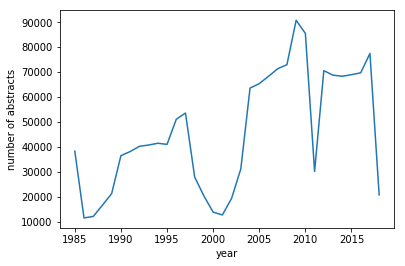

In [82]:
plt.plot(year_names, lens)
plt.xlabel("year")
plt.ylabel("number of abstracts");

In [41]:
tfidf = TfidfVectorizer(sublinear_tf = True, # use log to scale tf
                           norm = "l2", # norm method
                           ngram_range = (1, 1), # n-gram range to test (default is unigram to fourgram)
                           stop_words = "english")

In [47]:
tfidf_vect = tfidf.fit_transform(text_list_2000)

In [51]:
tfidf_vect.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [87]:
tokens_2000 = list()
for abstract in text_list_2000[1]:
    abstract_lower = abstract.lower()
#abstract_lower
    tokens = word_tokenize(abstract_lower)
tokens
    #tokens_no_stop = [token for token in tokens if token not in stopwords.words('english')]
#tokens_no_stop
    #tokens_2000.append(tokens_no_stop)

[]

In [88]:
abstract_lower = text_list_2000[1].lower()
tokens = word_tokenize(abstract_lower)
tokens_no_stop = [token for token in tokens if token not in stopwords.words('english')]

In [89]:
tokens_no_stop

['description',
 'students',
 'heavy',
 'drinking',
 'described',
 '``',
 'far',
 'single',
 'serious',
 'public',
 'health',
 'problem',
 'confronting',
 'american',
 'colleges',
 "''",
 '.',
 'research',
 'aims',
 'facilitate',
 'development',
 'improved',
 'alcohol',
 'abuse',
 'prevention',
 'programs',
 'fraternity',
 'men',
 '.',
 'specifically',
 ',',
 'research',
 'seeks',
 'evaluate',
 'impact',
 'two',
 'national',
 'fraternities',
 "'",
 'alcohol',
 'abuse',
 'prevention',
 'programs',
 ',',
 'examine',
 'associations',
 'changes',
 'theoretical',
 'alcohol',
 'consumption',
 'determinants',
 'reductions',
 'alcohol',
 'consumption',
 'levels',
 'among',
 'fraternity',
 'men',
 '.',
 'first',
 'year',
 'research',
 'utilized',
 'matched',
 'pair',
 ',',
 'randomized',
 'pre-post',
 'design',
 'measure',
 'impact',
 'prevention',
 'activities',
 '10',
 'fraternity',
 'chapters',
 ',',
 'compared',
 '10',
 'delayed',
 'intervention',
 'control',
 'chapters',
 '.',
 'sixty',
 '

In [54]:
tokens_2000

[['It',
  'has',
  'been',
  'shown',
  'that',
  'long',
  'term',
  'alcohol',
  'ingestion',
  'can',
  'lead',
  'to',
  'the',
  'development',
  'of',
  'chemical',
  'changes',
  'to',
  'proteins',
  '.',
  'It',
  'is',
  'believed',
  'that',
  'metabolism',
  'of',
  'alcohol',
  'by',
  'alcohol',
  'dehydrogenase',
  'to',
  'acetaldehyde',
  '(',
  'AA',
  ')',
  'and',
  'lipid',
  'peroxidation',
  'of',
  'polyunsaturated',
  'fats',
  'to',
  'malondialdehyde',
  '(',
  'MDA',
  ')',
  'results',
  'in',
  'the',
  'adduction',
  'of',
  'proteins',
  'with',
  'both',
  'of',
  'these',
  'aldehyde',
  'species',
  '.',
  'In',
  'fact',
  ',',
  'AA',
  'and',
  'MDA',
  'have',
  'been',
  'shown',
  'to',
  'react',
  'in',
  'a',
  'synergistic',
  'manner',
  'to',
  'form',
  'a',
  'distinct',
  'adduct',
  '(',
  'MAA',
  ')',
  'that',
  'has',
  'been',
  'found',
  'in',
  'in',
  'vitro',
  'as',
  'well',
  'as',
  'in',
  'vivo',
  'experimentally',
  '

In [ ]:
for abstract in tokens_2000:
    